In [ ]:
# Multiple Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load data (giữ như cấu trúc của bạn) ---
df = pd.read_csv('data/data2.csv')
x_raw = df.iloc[:, :-1].values.astype(np.float64)   # (m, n_features)
y = df.iloc[:, -1].values.astype(np.float64)        #vector (m,)
m = len(y)
print(m)

17000


In [20]:
# --- chuẩn hoá (feature-wise) ---
# Tính mean và std theo từng cột (axis=0)
mu = x_raw.mean(axis=0)               # (n_features,)
sigma = x_raw.std(axis=0, ddof=0)     # (n_features,)
# tránh chia cho 0 nếu 1 feature hằng số
sigma_safe = np.where(sigma == 0, 1.0, sigma)
xn = (x_raw - mu) / sigma_safe        # (m, n_features)

In [23]:
# --- build matrices X, Y ---
Y = y.reshape(-1, 1)                    # m×1
X = np.column_stack([np.ones(m), xn]).astype(float)    # (m, n+1)
print(X.shape)
m, n_plus_1 = X.shape

# --- gradient descent settings (giữ tên biến của bạn) ---
ite = 20000 # iteration
lr = 0.1 # learning rate
np.random.seed(1)
theta = np.random.rand(n_plus_1, 1)                # theta: (n+1)x1
J = np.zeros(ite)

# --- gradient descent loop (vectorized, đúng kích thước) ---
for i in range(ite):
    H = X.dot(theta)                        # m×1
    grad = (1.0/m) * (X.T.dot(H - Y))       # (n+1)×1
    theta = theta - lr * grad
    J[i] = ((1.0/(2*m)) * (H - Y).T.dot(H - Y)).item()

# --- nghiệm đóng (dùng pseudo-inverse cho ổn định) ---
theta_closed = np.linalg.pinv(X).dot(Y)   # (n+1)×1

# --- show theta ---
print("Theta (gradient descent):", theta.ravel())
print("Theta (normal equation):", theta_closed.ravel())

(17000, 9)
Theta (gradient descent): [207300.91235294 -86499.60728226 -91744.05083061  14483.29860201
 -18263.60700748  49587.33777165 -44178.15153005  17470.57604339
  77291.55314914]
Theta (normal equation): [207300.91235294 -86499.60728226 -91744.05083061  14483.29860201
 -18263.60700749  49587.33777166 -44178.15153005  17470.57604338
  77291.55314914]


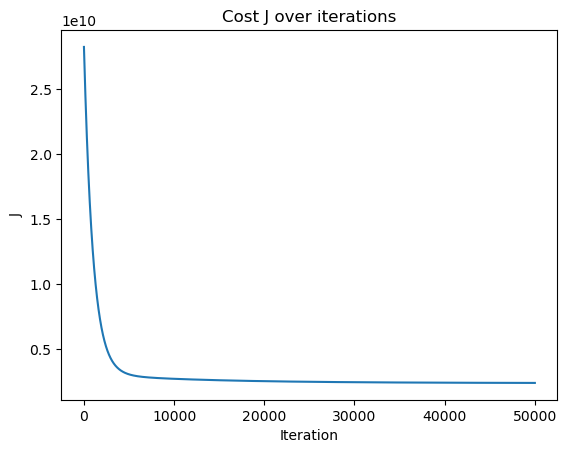

In [22]:
plt.figure()
plt.plot(np.arange(ite), J)
plt.title("Cost J over iterations")
plt.xlabel("Iteration")
plt.ylabel("J")
plt.show()